<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Пропуски-значений" data-toc-modified-id="Пропуски-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски значений</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-поведения-пользователей-двух-столиц" data-toc-modified-id="Сравнение-поведения-пользователей-двух-столиц-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение поведения пользователей двух столиц</a></span></li><li><span><a href="#Музыка-в-начале-и-в-конце-недели" data-toc-modified-id="Музыка-в-начале-и-в-конце-недели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Музыка в начале и в конце недели</a></span></li><li><span><a href="#Жанровые-предпочтения-в-Москве-и-Петербурге" data-toc-modified-id="Жанровые-предпочтения-в-Москве-и-Петербурге-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Жанровые предпочтения в Москве и Петербурге</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги исследования</a></span></li><li><span><a href="#Дополнительнео-исследование:" data-toc-modified-id="Дополнительнео-исследование:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Дополнительнео исследование:</a></span></li></ul></div>

# Исследование данных сервиса “Яндекс.Музыка”

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки сравним поведение пользователей двух столиц.

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей получим из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составим первое представление о данных Яндекс.Музыки.

Основной инструмент аналитика — `pandas`. Импортируем эту библиотеку.

In [1]:
# импорт библиотеки pandas
import pandas as pd

Прочитаем файл `yandex_music_project.csv` из папки `/datasets` и сохраним его в переменной `df`:

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/yandex_music_project.csv')

Выведем на экран первые десять строк таблицы:

In [3]:
# получение первых 10 строк таблицы df
display(df.head(10))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Одной командой получим общую информацию о таблице:

In [4]:
# получение общей информации о данных в таблице df
df.info()

def print_count_unique(data_frame):
    print('-'*50)
    print('Число уникальных значений:')
    for row in data_frame:
        print(f'{row:<15} {len(data_frame[row].unique()):>10}')

print_count_unique(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
  userID    65079 non-null object
Track       63848 non-null object
artist      57876 non-null object
genre       63881 non-null object
  City      65079 non-null object
time        65079 non-null object
Day         65079 non-null object
dtypes: object(7)
memory usage: 3.5+ MB
--------------------------------------------------
Число уникальных значений:
  userID             41748
Track                47246
artist               43606
genre                  290
  City                   2
time                 20392
Day                      3


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Для составных названий нужно применить змеиный регистр
4. Недостаточно описательные названия колонок. Из названий `track`, `artist`, `genre` неясно что за данные (т.е. что это именно названия и имена). Нужно добавить `_name`. Неясно что за `day`, лучше заменить на `weekday`.


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправим стиль в заголовках столбцов, исключим пропуски. Затем проверим данные на дубликаты.

### Стиль заголовков
Выведем на экран названия столбцов:

In [5]:
# перечень названий столбцов таблицы df
display(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведем названия в соответствие с хорошим стилем:
* несколько слов в названии запишем в «змеином_регистре»,
* все символы сделаем строчными,
* устраним пробелы.

Для этого переименуем колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [6]:
# переименование столбцов
df = df.rename(columns = {'  userID': 'user_id', 'Track': 'track_name', 'artist': 'artist_name', 'genre': 'genre_name', '  City  ': 'city', 'Day': 'weekday'})

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [7]:
# проверка результатов - перечень названий столбцов
display(df.columns)

Index(['user_id', 'track_name', 'artist_name', 'genre_name', 'city', 'time',
       'weekday'],
      dtype='object')

### Пропуски значений
Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`:

In [8]:
# подсчёт пропусков
display(df.isna().sum())

user_id           0
track_name     1231
artist_name    7203
genre_name     1198
city              0
time              0
weekday           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track_name` и `artist_name` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre_name` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `track_name`, `artist_name` и `genre_name` на строку `'unknown'`. Для этого создадим список `columns_to_replace`, переберем его элементы циклом `for` и для каждого столбца выполнис замену пропущенных значений:

In [9]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track_name', 'artist_name', 'genre_name']
for name in columns_to_replace:
    df[name] = df[name].fillna('unknown')

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения.

In [10]:
# подсчёт пропусков
display(df.isna().sum())

user_id        0
track_name     0
artist_name    0
genre_name     0
city           0
time           0
weekday        0
dtype: int64

### Дубликаты
Посчитаем явные дубликаты в таблице одной командой:

In [11]:
# подсчёт явных дубликатов
display(df.duplicated().sum())

3826

Вызовите специальный метод `pandas`, чтобы удалить явные дубликаты:

In [12]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

Ещё раз посчитайте явные дубликаты в таблице — убедимся, что полностью от них избавились:

In [13]:
# проверка на отсутствие дубликатов
display(df.duplicated().sum())

0

Теперь избавимся от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведем на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлечем нужный столбец датафрейма, 
* применим к нему метод сортировки,
* для отсортированного столбца вызовим метод, который вернёт уникальные значения из столбца.

In [14]:
# Функция вывода уникальных значений столюца и их количества:
def print_unique(data_frame, column):
    uniques = df[column].sort_values().unique()
    display(uniques)
    print('Итого кол-во уникальных значений:', len(uniques))

# Просмотр уникальных названий жанров
print_unique(df, 'genre_name')

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Итого кол-во уникальных значений: 290


Просмотрим список и найдем неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Увидем следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [15]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(data_frame, wrong_genres, correct_genre, column='genre_name'):
    for wrong_value in wrong_genres:
        data_frame[column] = data_frame[column].replace(wrong_value, correct_genre)

Вызовим `replace_wrong_genres()` и передадим ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [16]:
# Устранение неявных дубликатов
replace_wrong_genres(df, ['hip', 'hop', 'hip-hop'], 'hiphop')
replace_wrong_genres(df, ['электроника'], 'electronic')

Проверим, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведем отсортированный список уникальных значений столбца `genre`:

In [17]:
# Проверка на неявные дубликаты
print_unique(df, 'genre_name')

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Итого кол-во уникальных значений: 286


Просмотрим общую информацию об измененной таблице:

In [18]:
# получение общей информации о данных в таблице df
df.info()

print_count_unique(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61253 entries, 0 to 61252
Data columns (total 7 columns):
user_id        61253 non-null object
track_name     61253 non-null object
artist_name    61253 non-null object
genre_name     61253 non-null object
city           61253 non-null object
time           61253 non-null object
weekday        61253 non-null object
dtypes: object(7)
memory usage: 3.3+ MB
--------------------------------------------------
Число уникальных значений:
user_id              41748
track_name           47246
artist_name          43606
genre_name             286
city                     2
time                 20392
weekday                  3


**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез.

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Для тренировки сначала выполним каждый из расчётов по отдельности. 

Оценим активность пользователей в каждом городе. Сгруппируем данные по городу и посчитайте прослушивания в каждой группе.



In [19]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['user_id'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: user_id, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируем данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтите, что в данных есть информация только о прослушиваниях только за эти дни.


In [20]:
# Подсчёт прослушиваний в каждый из трёх дней
df.groupby('weekday')['user_id'].count()

weekday
Friday       21840
Monday       21354
Wednesday    18059
Name: user_id, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Мы видели, как работает группировка по городу и по дням недели. Теперь напишем функцию, которая объединит два эти расчёта.

Создадим функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраните в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого применим последовательную фильтрацию с логической индексацией.

Затем посчитаем значения в столбце `user_id` получившейся таблицы. Результат сохраним в новую переменную. Вернем эту переменную из функции.

In [21]:
# <создание функции number_tracks()>
# Объявляется функция с двумя параметрами: day, city.
# В переменной track_list сохраняются те строки таблицы df, для которых 
# значение в столбце 'day' равно параметру day и одновременно значение
# в столбце 'city' равно параметру city (используйте последовательную фильтрацию
# с помощью логической индексации).
# В переменной track_list_count сохраняется число значений столбца 'user_id',
# рассчитанное методом count() для таблицы track_list.
# Функция возвращает число - значение track_list_count.

# Функция для подсчёта прослушиваний для конкретного города и дня.
# С помощью последовательной фильтрации с логической индексацией она 
# сначала получит из исходной таблицы строки с нужным днём,
# затем из результата отфильтрует строки с нужным городом,
# методом count() посчитает количество значений в колонке user_id. 
# Это количество функция вернёт в качестве результата
def number_tracks(data_frame, city, weekday):
    track_list = data_frame[data_frame['city'] == city]
    track_list = track_list[track_list['weekday'] == weekday]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовем `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [22]:
# Таблица результатов первого исследования
result_1 = [['Москва'],['Санкт-Петербург']]

# Параметры выборки:
cities = ['Moscow', 'Saint-Petersburg']
all_days = list(df['weekday'].unique())
print(all_days)

# Заполонение таблицы результатов первого исследования:
for i in range(len(cities)):
    for day in all_days:
        result_1[i].append(number_tracks(df, cities[i], day))

['Wednesday', 'Friday', 'Monday']


Создадим c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

In [29]:
# Таблица с результатами
result_1_columns = ['city', 'monday', 'wednesday', 'friday']
table_1 = pd.DataFrame(data=result_1, columns=result_1_columns)
table_1

,city,monday,wednesday,friday
0,Москва,11056,15945,15740
1,Санкт-Петербург,7003,5895,5614


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [30]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']

In [31]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']

Создадим функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [32]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)
def genre_weekday(data_frame, weekday, time1, time2):
    genre_df = data_frame[data_frame['weekday'] == weekday]
    genre_df = genre_df[genre_df['time'] > time1]
    genre_df = genre_df[genre_df['time'] < time2]
    genre_df_count = genre_df.groupby('genre_name')['genre_name'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted.head(10)

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [33]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre_name
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre_name, dtype: int64

In [34]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre_name
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre_name, dtype: int64

In [35]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre_name
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre_name, dtype: int64

In [36]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

genre_name
pop            256
rock           216
electronic     216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: genre_name, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицу `moscow_general` по жанру и посчитаем прослушивания треков каждого жанра методом `count()`. Затем отсортируем результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [37]:
# одной строкой: группировка таблицы moscow_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres
moscow_genres = moscow_general.groupby('genre_name')['genre_name'].count().sort_values(ascending=False)

moscow_genres_df = pd.DataFrame(moscow_genres)
moscow_genres_df.set_axis(['count'], axis='columns', inplace=True)

moscow_genres_df = moscow_genres_df.reset_index()
moscow_genres_df['percent'] = moscow_genres_df['count'].apply(lambda x: round(x/moscow_genres_df['count'].sum()*100, 3))

#moscow_genres_comb = pd.concat([moscow_genres, moscow_genres_percent], axis=1, ignore_index=True).rename(columns={0: 'absolute', 1:'percent'}).reset_index()


Выведите на экран первые десять строк `moscow_genres`:

In [38]:
# просмотр первых 10 строк moscow_genres
display(moscow_genres_df.head(10))

,genre_name,count,percent
0,pop,5892,13.785
1,dance,4435,10.376
2,rock,3965,9.277
3,electronic,3786,8.858
4,hiphop,2096,4.904
5,classical,1616,3.781
6,world,1432,3.350
7,alternative,1379,3.226
8,ruspop,1372,3.210
9,rusrap,1161,2.716


Теперь повторим то же и для Петербурга.

Сгруппируем таблицу `spb_general` по жанру. Посчитаем прослушивания треков каждого жанра. Результат отсортируем в порядке убывания и сохраним в таблице `spb_genres`:


In [39]:
# одной строкой: группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres
spb_genres = spb_general.groupby('genre_name')['genre_name'].count().sort_values(ascending=False)

spb_genres_df = pd.DataFrame(spb_genres)
spb_genres_df.set_axis(['count'], axis='columns', inplace=True)

spb_genres_df = spb_genres_df.reset_index()
spb_genres_df['percent'] = spb_genres_df['count'].apply(lambda x: round(x/spb_genres_df['count'].sum()*100, 3))

Выведем на экран первые десять строк `spb_genres`:

In [40]:
# просмотр первых 10 строк spb_genres
spb_genres_df.head(10)

,genre_name,count,percent
0,pop,2431,13.132
1,dance,1932,10.436
2,rock,1879,10.150
3,electronic,1737,9.383
4,hiphop,960,5.186
5,alternative,649,3.506
6,classical,646,3.490
7,rusrap,564,3.047
8,ruspop,538,2.906
9,world,515,2.782


**Выводы**

Гипотеза опровергнута.

В Москве и Петербурге предпочитают одинаковые жанры музыки:
* Перечень топ-10 жанров идентичен
* Топ 5 жанров имеют одинаковое распределение процентов прослешивания: 13%, 10%, 10%, 9%, 5%
* Остальные 5 жанров из топ 10 имеют распределение прослушивания порядка 3%
* Слабое подтвержение гипотезы имеется в опережении pop жанра в москве на 0,5%, а rock жанра в Питере на 1 %




## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 

## Дополнительнео исследование:

**Гипотеза:**

4. Если число прослушиваний имеет пики в течение дня, то в это время можно добавлять рекламу


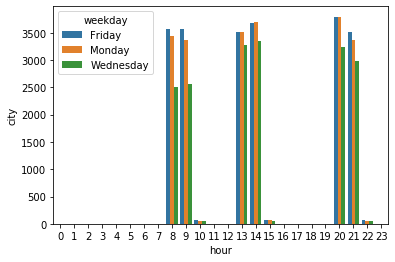

In [41]:
import seaborn as sb

df['hour'] = df['time'].apply(lambda x: int(x.split(':')[0]))
#display(df.head(10))

hours = df.groupby(['hour', 'weekday'])['city'].count().reset_index()

for i in range(24):
    if not i in hours['hour'].unique():
        for day in all_days:
            hours = hours.append({'hour': i, 'weekday': day, 'city': 0}, ignore_index=True)

sb.barplot(x=hours['hour'], y=hours['city'], hue=hours['weekday'])

#display(hours)

**Выводы:**

Действительно прослушивание композиций независимо от дня недели имеет три пика прослушивания музыки с 8 до 10 часов, с 13 до 15 часов и с 20 до 23 часов